Import necessary libraries and the dataset itself

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 150 # Make figures have reasonable resolution when exporting
import statsmodels.api as statsmod
#For Linear Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


df_Movies = pd.read_csv("IMDB-Movie-Data.csv")

Clean data

In [ ]:
df_Movies.dropna(inplace = True)
df_Movies.drop('Rank',axis = 1, inplace = True)
print(df_Movies.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               838 non-null    object 
 1   Genre               838 non-null    object 
 2   Description         838 non-null    object 
 3   Director            838 non-null    object 
 4   Actors              838 non-null    object 
 5   Year                838 non-null    int64  
 6   Runtime (Minutes)   838 non-null    int64  
 7   Rating              838 non-null    float64
 8   Votes               838 non-null    int64  
 9   Revenue (Millions)  838 non-null    float64
 10  Metascore           838 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 78.6+ KB
None


What factors affect the revenue of a movie?

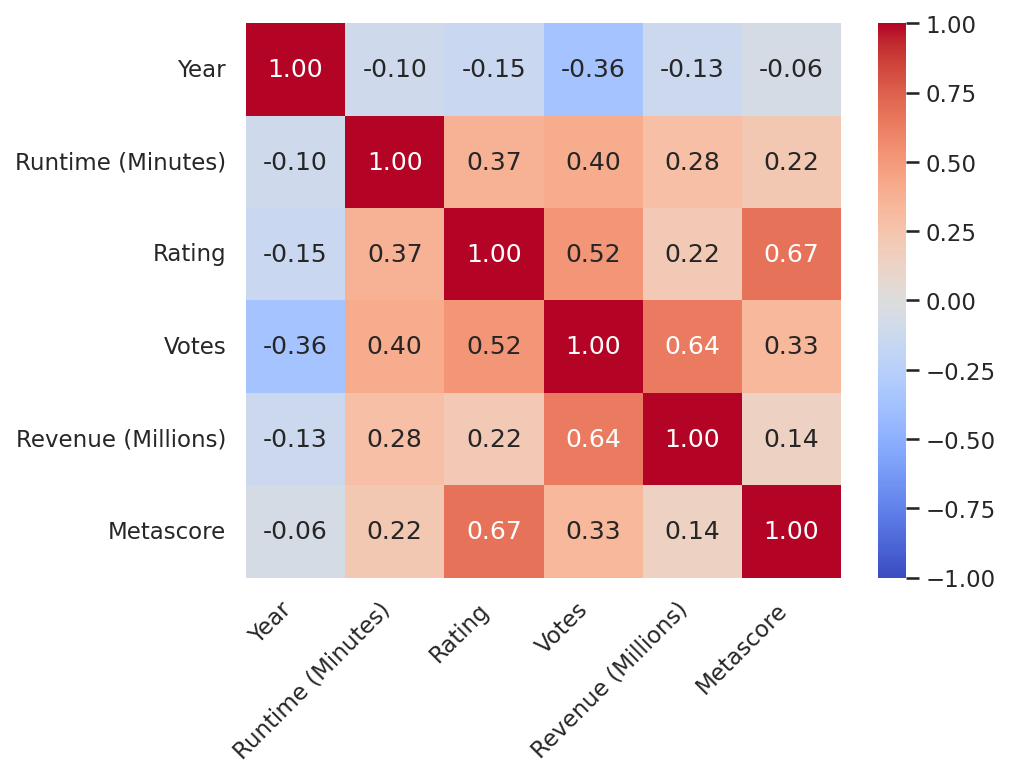

In [ ]:
# Compute the correlation matrix
corr_matrix = df_Movies.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=corr_matrix.columns, fmt='.2f', vmin=-1)
plt.xticks(rotation=45, ha='right')
#plt.title('Correlation Heatmap of IMDb-Movie-Data')
plt.show()

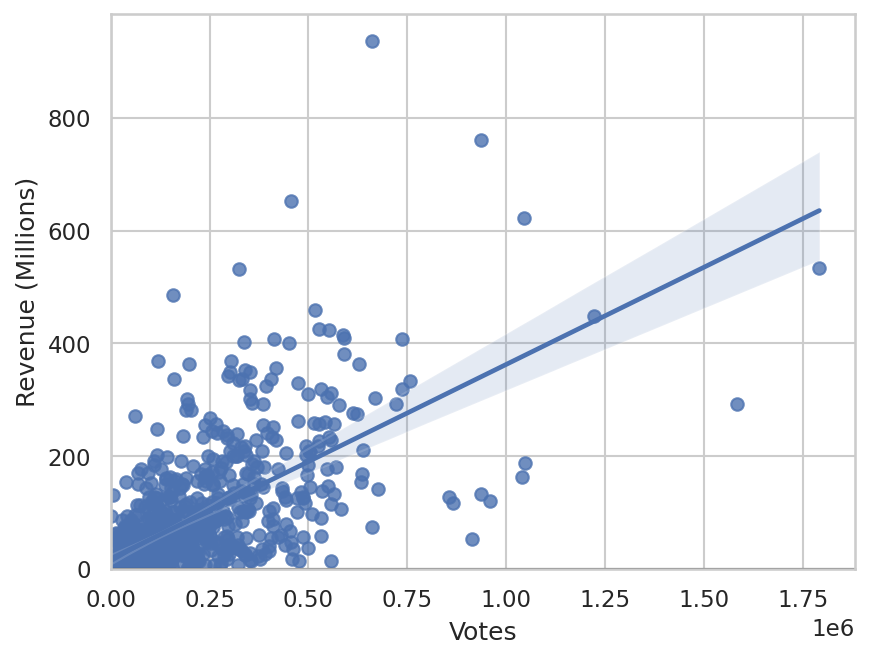

In [ ]:
# Select the columns we want to include in the scatterplot matrix
cols = ['Revenue (Millions)','Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Metascore']

#Create scatterplot for just revenue vs votes
sns.regplot(x="Votes", y="Revenue (Millions)", data=df_Movies)

# Add horizontal and vertical lines at zero
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)

# Set the x and y limits to start at zero
plt.xlim(left=0)
plt.ylim(bottom=0)

# Set the title and axis labels
#plt.title('Revenue vs Votes')
plt.xlabel('Votes')
plt.ylabel('Revenue (Millions)')

# Show the plot
plt.show()

Can we predict the revenue of the movie?

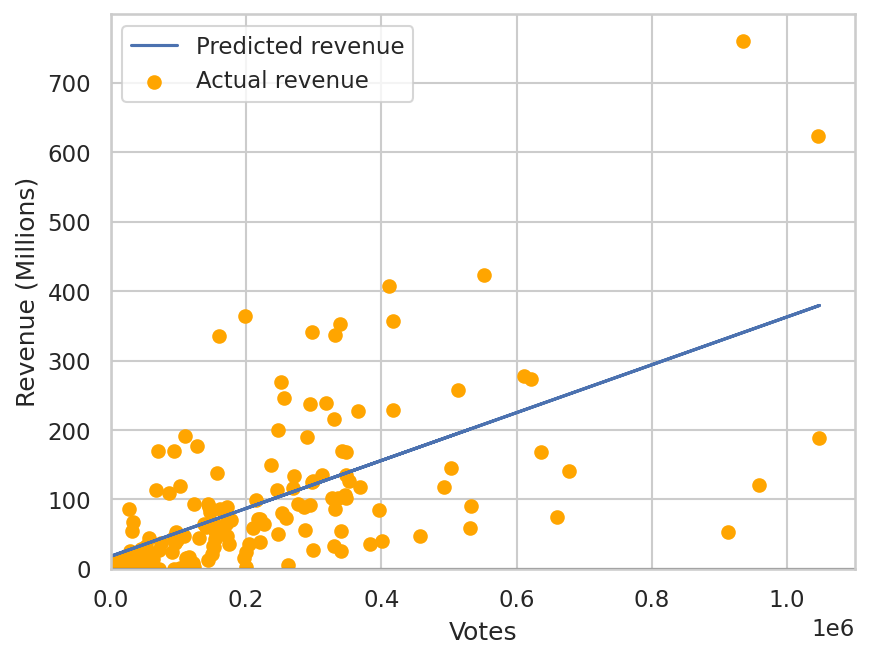

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &    0.410  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    0.409  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    464.3  \\
\textbf{Date:}             & Mon, 03 Apr 2023 & \textbf{  Prob (F-statistic):} & 1.37e-78  \\
\textbf{Time:}             &     23:21:47     & \textbf{  Log-Likelihood:    } &  -3873.1  \\
\textbf{No. Observations:} &         670      & \textbf{  AIC:               } &    7750.  \\
\textbf{Df Residuals:}     &         668      & \textbf{  BIC:               } &    7759.  \\
\textbf{Df Model:}         &           1      & \textbf{                     } &           \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &           \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabular}{lccc

In [ ]:
votes = df_Movies['Votes'].values.reshape(-1,1)
revenues = df_Movies['Revenue (Millions)'].values.reshape(-1,1)
thismodel = LinearRegression()

votes_train, votes_test, revenues_train, revenues_test = train_test_split(votes, revenues, test_size=0.2, random_state=42)
thismodel.fit(votes_train,revenues_train)
revenuesPrediction = thismodel.predict(votes_test)

plt.plot(votes_test,revenuesPrediction,label='Predicted revenue')
plt.scatter(votes_test,revenues_test,c='Orange',label='Actual revenue')

plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Votes')
plt.ylabel('Revenue (Millions)')
plt.legend()
plt.show()

statsx = statsmod.add_constant(votes_train)
table2 = statsmod.OLS(revenues_train, statsx).fit()
for table in table2.summary().tables:
    print(table.as_latex_tabular())


What factors affect the user score of a movie?

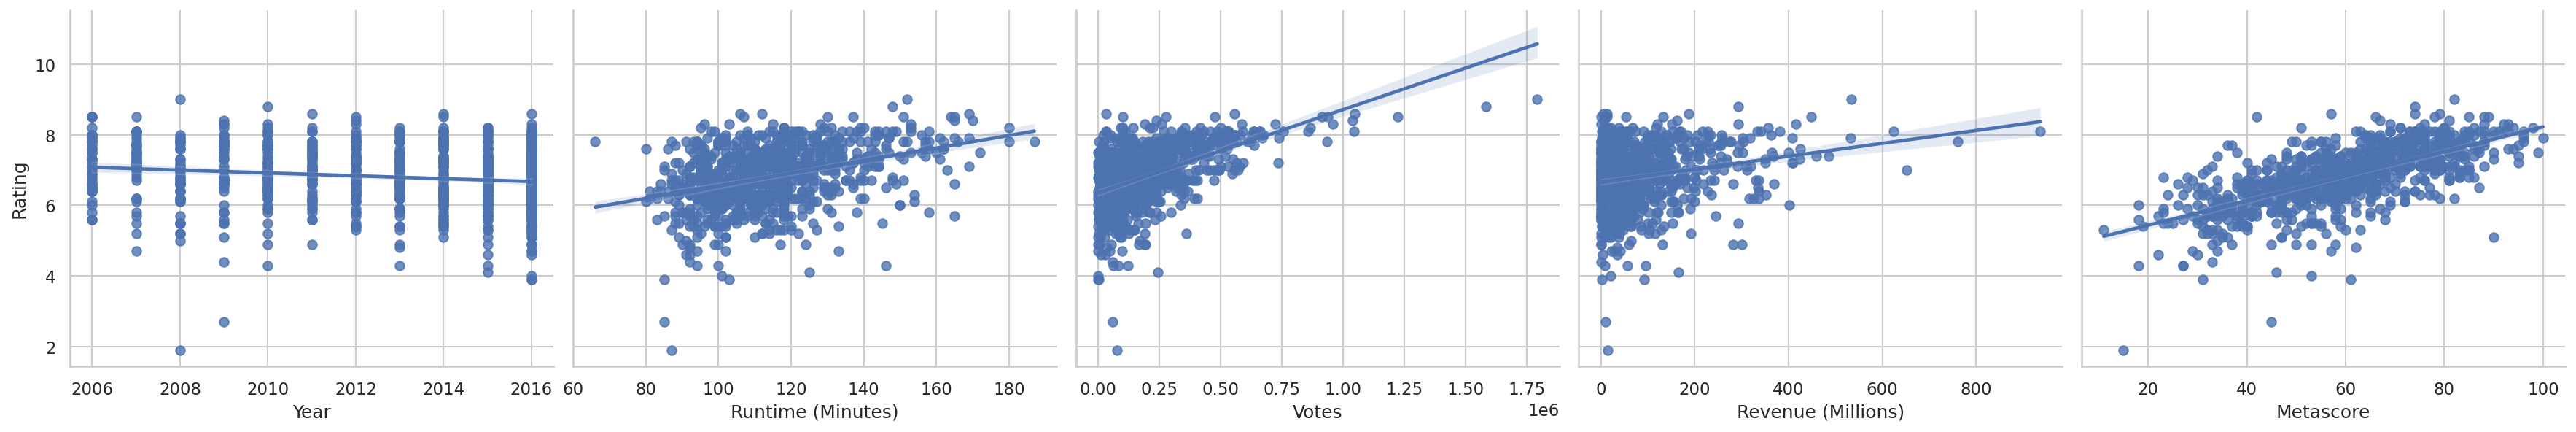

In [ ]:
cols = ['Rating','Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)','Metascore']

#Create scatterplot
sns.pairplot(df_Movies, x_vars=cols[1:], y_vars=[cols[0]], height=4, aspect=1.2, kind='reg')

# Show the plot
plt.show()

Can we predict the user score of movie, regardless of its revenue? 

In [ ]:
from sklearn.externals._packaging.version import PrePostDevType
y = df_Movies['Rating'].values.reshape(-1,1)
x = df_Movies[['Runtime (Minutes)','Metascore','Votes']]



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
PredY = model.predict(x_test)


print("Mean squared error", mean_squared_error(y_test,PredY))
statsx = statsmod.add_constant(x_train)
table3 = statsmod.OLS(y_train, statsx).fit()
table3.summary()
for table in table3.summary().tables:
    print(table.as_latex_tabular())

Mean squared error 0.3065907741917759
\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.553  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.551  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     275.1  \\
\textbf{Date:}             & Mon, 03 Apr 2023 & \textbf{  Prob (F-statistic):} & 4.02e-116  \\
\textbf{Time:}             &     23:21:50     & \textbf{  Log-Likelihood:    } &   -590.05  \\
\textbf{No. Observations:} &         670      & \textbf{  AIC:               } &     1188.  \\
\textbf{Df Residuals:}     &         666      & \textbf{  BIC:               } &     1206.  \\
\textbf{Df Model:}         &           3      & \textbf{                     } &            \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &            \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\

What is the relationship between the distribution of ranked position and number of votes? 

In [ ]:
# Create a new column called 'combined_score' that combines 'rating' and 'metascore' with equal weighting
df_Movies['combined_score'] = ((df_Movies['Rating']*10) + df_Movies['Metascore']) / 2

# Print the first 5 rows of the updated dataset
#print(df_Movies.head())

# Find the movie with the lowest combined_score
min_combined = df_Movies['combined_score'].min()
lowest_combined_movie = df_Movies[df_Movies['combined_score'] == min_combined]

# Remove the movie with the lowest combined score from the dataset
df_Movies = df_Movies[df_Movies['combined_score'] != min_combined]

# Print the removed movie
print('Removed movie with the lowest combined score:')
print(lowest_combined_movie)

Removed movie with the lowest combined score:
              Title   Genre  \
829  Disaster Movie  Comedy   

                                           Description         Director  \
829  Over the course of one evening, an unsuspectin...  Jason Friedberg   

                                                Actors  Year  \
829  Carmen Electra, Vanessa Lachey,Nicole Parker, ...  2008   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  \
829                 87     1.9  77207               14.17       15.0   

     combined_score  
829            17.0  


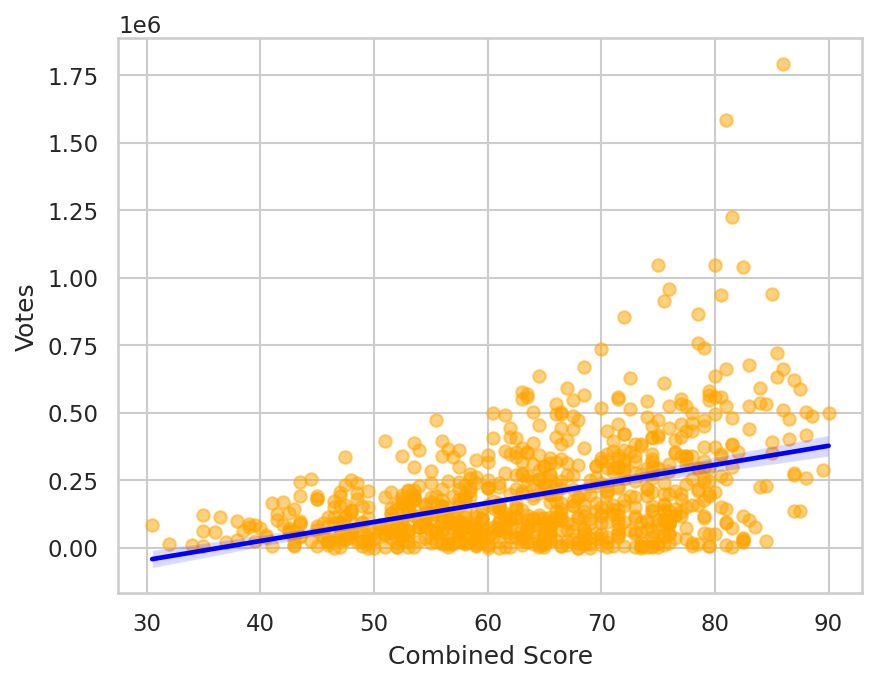

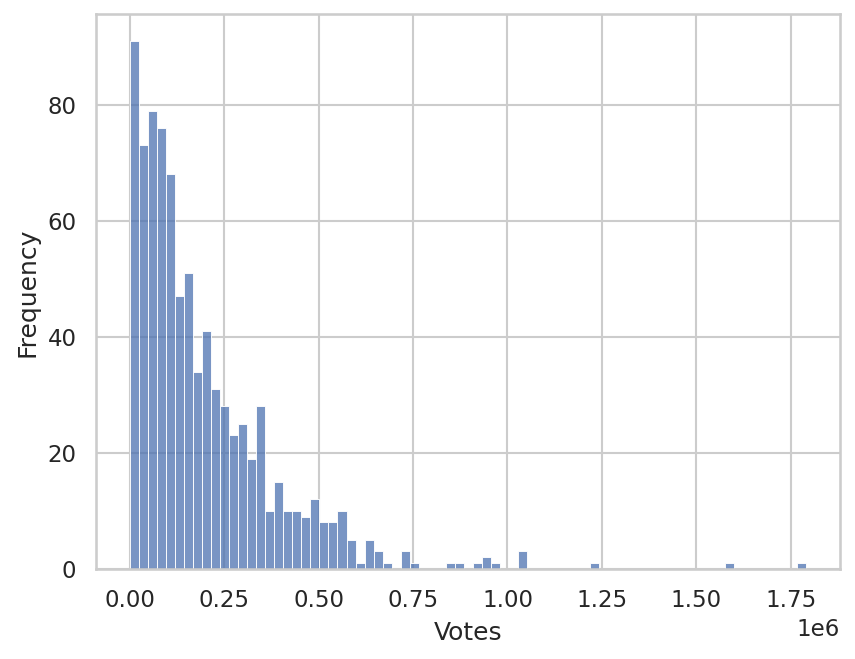

In [ ]:
# Create a scatter plot with a regression line using seaborn
sns.regplot(data=df_Movies, x='combined_score', y='Votes', scatter_kws={'alpha':0.5}, color='orange', line_kws={'color':'blue'}) #logx=True

# Set the y-axis to a logarithmic scale
#plt.yscale('log')

# Set the title and axis labels
#plt.title('IMDb Movie Combined Scores and Votes')
plt.xlabel('Combined Score')
plt.ylabel('Votes')

# Show the plot
plt.show()

# Create a histogram of the number of votes using seaborn, using a logarithmic scale
sns.histplot(data=df_Movies, x='Votes', bins=75)

# Set the title and axis labels
#plt.title('Distribution of IMDb Movie Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
from scipy.stats import spearmanr, linregress, shapiro

# Calculate the Spearman rank correlation coefficient and p-value
corr, pval = spearmanr(df_Movies['combined_score'], df_Movies['Votes'])

# Print the correlation coefficient and p-value
print('Spearman rank correlation coefficient:', corr)
print('p-value:', pval)


Spearman rank correlation coefficient: 0.39309323106787175
p-value: 2.5634817202379793e-32


How do the ratings and Metascore’s change across genres and how strong is the relationship between them?

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Compute the Pearson correlation coefficient and p-value
corr, pval = pearsonr(df_Movies['Rating'], df_Movies['Metascore'])

# Print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {pval:.3f}")

Pearson correlation coefficient: 0.671
P-value: 0.000


        Genre  Rating  Metascore  Average
0     History    73.2       73.6     73.4
1   Animation    73.1       70.6     71.8
2   Biography    73.5       69.5     71.5
3         War    76.0       66.3     71.2
4     Western    72.5       64.8     68.6
5       Drama    70.4       64.6     67.5
6       Sport    70.9       61.4     66.1
7     Mystery    69.7       61.3     65.5
8       Music    71.7       60.7     66.2
9     Musical    69.4       60.0     64.7
10   Thriller    67.9       59.7     63.8
11      Crime    69.0       58.8     63.9
12     Comedy    67.3       58.5     62.9
13     Sci-Fi    67.7       58.4     63.0
14  Adventure    68.0       57.8     62.9
15     Horror    62.9       56.5     59.7
16     Family    66.7       56.2     61.5
17    Romance    67.0       55.5     61.2
18    Fantasy    66.3       55.1     60.7
19     Action    66.5       54.0     60.3
\begin{tabular}{rlrrr}
\hline
   Genre & Rating    &   Metascore &   Difference &   Average \\
\hline
       0 & Histo

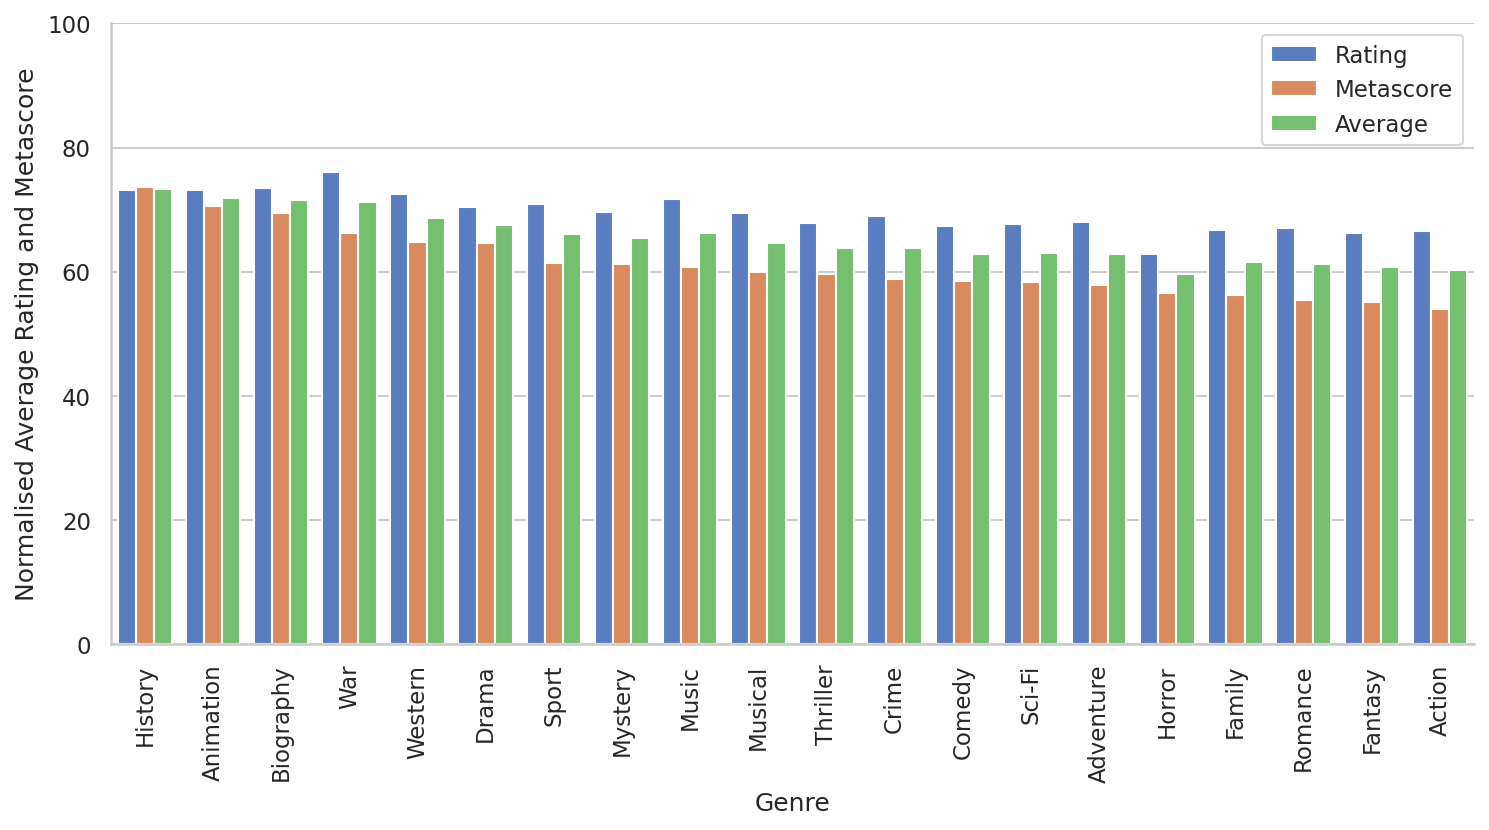

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Split the genres using str.split() method
df_Movies['Genre'] = df_Movies['Genre'].str.split(',')

# Split the genres column to create a separate row for each genre
df_Movies = df_Movies.assign(genres=df_Movies.Genre.str.split(',')).explode('Genre')

# Normalise Rating
df_Movies['Rating'] = (df_Movies['Rating']*10)

# Group the dataset by genre and calculate the mean user rating and Metascore
genre_ratings = df_Movies.groupby('Genre')[['Rating', 'Metascore']].mean().sort_values(by='Metascore', ascending=False).reset_index()

genre_ratings_copy = genre_ratings
genre_ratings_copy['Average'] = ((genre_ratings_copy['Rating'] + genre_ratings_copy['Metascore'])/2)
genre_ratings_copy['Rating'] = genre_ratings_copy['Rating'].round(1)
genre_ratings_copy['Metascore'] = genre_ratings_copy['Metascore'].round(1)
genre_ratings_copy['Average'] = genre_ratings_copy['Average'].round(1)
genre_ratings_copy

# Print the resulting table
print(genre_ratings_copy)

# Generate LaTeX table
#table = tabulate(genre_ratings_copy, headers=['Genre', 'Rating', 'Metascore', 'Average'], tablefmt='latex', floatfmt=".2f")

# Print LaTeX table
#print(table)

# Create a catplot to visualize the results using seaborn
sns.set(style="whitegrid")
g = sns.catplot(x="Genre", y="value", hue="variable", data=pd.melt(genre_ratings, ['Genre']),
                kind="bar", height=5, aspect=2, palette=sns.color_palette("muted"), legend=False)

# Add labels, title, and legend
g.set_axis_labels("Genre", "Normalised Average Rating and Metascore")
g.set_xticklabels(rotation=90)
g.set(ylim=(0, 100))
#plt.title('Ratings and Metascore by Genre')

# Add the legend
plt.legend(title=None, loc='upper right')

plt.show()

